# 《动手学深度学习》预备知识

导入包

In [1]:
import os

import numpy as np
import pandas as pd
import torch

让每个cell显示全部输出结果

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

信任当前文件

In [3]:
!jupyter trust 1.预备知识.ipynb

Signing notebook: 1.预备知识.ipynb


## 数据操作、数据预处理(4)

### 创建数据与访问元素

#### 创建数据 

随机生成形状为(3,4)的array，且每一个元素服从均值为0、标准差为1的正态分布

In [4]:
np.random.seed(1)  # 给定随机数种子，使每次随机的结果固定
np.random.normal(0, 1, (3, 4))

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ,  1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038,  1.46210794, -2.06014071]])

生成有序数据

使用numpy、torch和torch+list多种方法生成矩阵

In [5]:
np_data = np.arange(1, 17).reshape(4, 4)
torch_data = torch.arange(1, 17).reshape(4, 4)
torch_data_byList = torch.tensor(
    [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
)
np_data
torch_data
torch_data_byList

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

#### 访问一个元素

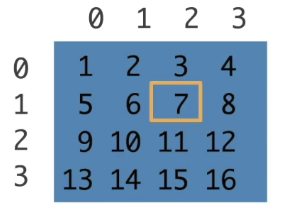

In [6]:
np_data[1, 2]
torch_data[1, 2]

7

tensor(7)

#### 访问一行

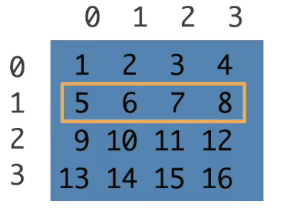

In [7]:
np_data[1, :]
torch_data[1, :]

array([5, 6, 7, 8])

tensor([5, 6, 7, 8])

#### 访问一列

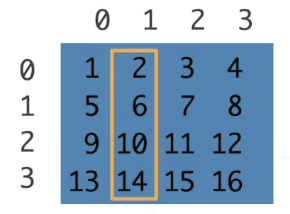

In [8]:
np_data[:, 1]
torch_data[:, 1]

array([ 2,  6, 10, 14])

tensor([ 2,  6, 10, 14])

#### 访问单个子区域

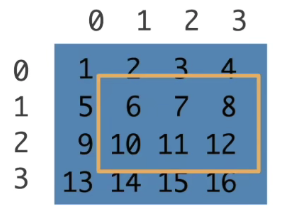

In [9]:
np_data[1:3, 1:]
torch_data[1:3, 1:]

array([[ 6,  7,  8],
       [10, 11, 12]])

tensor([[ 6,  7,  8],
        [10, 11, 12]])

#### 访问多个子区域

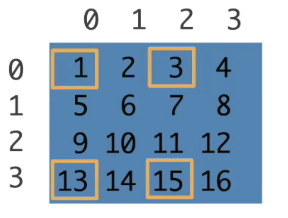

In [10]:
np_data[::3, ::2]
torch_data[::3, ::2]

array([[ 1,  3],
       [13, 15]])

tensor([[ 1,  3],
        [13, 15]])

### 张量的常用操作

#### 标准算数运算（`+`、`-`、`*`、`/`、`**`）

In [11]:
x = torch.tensor([2, 2, 2, 2])
y = torch.arange(1, 5, dtype=float)

print("x:", x)
print("y:", y)
print("x+y:", x + y)
print("x-y:", x - y)
print("x*y:", x * y)
print("x/y:", x / y)
print("x**y:", x ** y)

x: tensor([2, 2, 2, 2])
y: tensor([1., 2., 3., 4.], dtype=torch.float64)
x+y: tensor([3., 4., 5., 6.], dtype=torch.float64)
x-y: tensor([ 1.,  0., -1., -2.], dtype=torch.float64)
x*y: tensor([2., 4., 6., 8.], dtype=torch.float64)
x/y: tensor([2.0000, 1.0000, 0.6667, 0.5000], dtype=torch.float64)
x**y: tensor([ 2.,  4.,  8., 16.], dtype=torch.float64)


#### 张量连结

In [12]:
x = torch.zeros(12, dtype=torch.float32).reshape(3, 4)
y = torch.ones(12, dtype=torch.float32).reshape(3, 4)
torch.cat((x, y), dim=0)
torch.cat((x, y), dim=1)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

tensor([[0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1.]])

#### 通过逻辑运算符构建二元张量 

In [13]:
x = torch.tensor([[1, 2, 3, 4], [1, 2, 3, 4]])
y = torch.tensor([[1, 2, 3, 4], [1, 1, 1, 1]])
x == y

tensor([[ True,  True,  True,  True],
        [ True, False, False, False]])

### 广播机制`broadcasting mechanism`   

In [14]:
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
print("a:", a)
print("b:", b)

# a+b 通过广播机制，a广播成为3*2 b广播成3*2，然后再进行相加, 结果是3*2。
a + b

a: tensor([[0],
        [1],
        [2]])
b: tensor([[0, 1]])


tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 数据预处理 

创建csv格式的数据文件

In [15]:
%%capture
# 上述语句控制这个cell不打印输出
os.makedirs("data", exist_ok=True)
data_file = os.path.join("data", "lesson4_house_tiny.csv")
with open(data_file, "w") as f:
    f.write("NumRooms,Alley,Price\n")
    f.write("NA,Pave,126500\n")
    f.write("2,NA,106000\n")
    f.write("4,NA,178100\n")
    f.write("NA,NA,140000\n")

使用pandas读入数据

In [16]:
pd_data = pd.read_csv(os.path.join("data", "lesson4_house_tiny.csv"))
pd_data

,NumRooms,Alley,Price
0,NaN,Pave,126500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


#### 处理缺失数据

In [36]:
inputs, outputs = pd_data.iloc[:, 0:2], pd_data.iloc[:, 2:]
inputs
inputs = inputs.fillna(inputs.mean(numeric_only=True))  # 使用均值填充缺失值
inputs

,NumRooms,Alley
0,NaN,Pave
1,2.0,NaN
2,4.0,NaN
3,NaN,NaN


,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


#### one hot 编码

In [37]:
inputs_without_dummy_na = pd.get_dummies(inputs, dummy_na=False)
inputs_without_dummy_na
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave
0,3.0,1
1,2.0,0
2,4.0,0
3,3.0,0


,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


#### 将预处理后的数据合并

In [19]:
X = torch.tensor(inputs.values, dtype=torch.float32)
y = torch.tensor(outputs.values)
X
y

tensor([[3., 1.],
        [2., 0.],
        [4., 0.],
        [3., 0.]])

tensor([[126500],
        [106000],
        [178100],
        [140000]])

#### reshape后的修改会影响原张量中的元素

In [20]:
a = np.arange(12)
print("a的初始值", a)
b = a.reshape(3, 4)
b[:] = 2
print("对b进行reshape后a中的元素:", a)

a的初始值 [ 0  1  2  3  4  5  6  7  8  9 10 11]
对b进行reshape后a中的元素: [2 2 2 2 2 2 2 2 2 2 2 2]


#### 将大小为1的张量转换为Python中的标量

In [21]:
a = torch.tensor([2.3], dtype=torch.float32)
a
a.item()
float(a)

tensor([2.3000])

2.299999952316284

2.299999952316284

#### tensor 和 array 的区别 

tensor是数学上的概念，即张量。  
array是计算机上的概念。

## 线性代数(5)

### 范数


在`pytorch`中，计算范数用到`torch.linalg`这个库，可以统一用`torch.norm`这个函数。也可以分别使用对应的函数。求向量范数使用函数`torch.linalg.vector_norm`；求矩阵范数使用函数`torch.linalg.matrix_norm`。

需要注意`torch.norm`已经被弃用了，不要使用这个函数。

在`numpy`中，计算范数用到`torch.linalg.norm`这个函数。


`linalg`是线性代数`Linear Algebra`相关运算的库。可以计算矩阵和向量的范数、逆矩阵、求特征值、解线性方程组以及求解行列式等。

#### 向量范数 
在向量范数中，范数用于比较两个向量在不同“规范”上的大小。

##### $L_0$范数

向量中非0的元素的个数

$$\left \| X \right \|_{0} = \sum_{i=1}^{n} \left | x_i \right | ^0$$

In [104]:
X = torch.arange(4,dtype=torch.float32)
X
np.linalg.norm(X,ord=0)
torch.linalg.vector_norm(X,ord=0)
torch.linalg.norm(X,ord=0)

tensor([0., 1., 2., 3.])

3.0

tensor(3.)

tensor(3.)

##### $L_1$范数

表示向量元素的绝对值之和

$$\left \| X \right \|_{1} = \sum_{i=1}^{n} \left | x_i \right |$$

In [105]:
X = torch.arange(4,dtype=torch.float32)
X
np.linalg.norm(X,ord=1)
torch.linalg.vector_norm(X,ord=1)
torch.linalg.norm(X,ord=1)

tensor([0., 1., 2., 3.])

6.0

tensor(6.)

tensor(6.)

##### $L_2$范数
Euclid范数（欧几里得范数），即向量的模，常用计算向量长度

向量元素平方和的平方根

$$\left \| X \right \|_{2} = \sqrt{\sum_{i=1}^{n} \left |x_i \right | ^2} $$

In [106]:
X = torch.arange(4,dtype=torch.float32)
X
np.linalg.norm(X,ord=2)
torch.linalg.vector_norm(X,ord=2)
torch.linalg.norm(X,ord=2)

tensor([0., 1., 2., 3.])

3.7416575

tensor(3.7417)

tensor(3.7417)

#####  $\infty$范数
所有向量元素绝对值中的最大值

$$\left \| X \right \| _\infty = \max_{i} \left | x_i \right |$$

In [108]:
X = torch.arange(4,dtype=torch.float32)
X
np.linalg.norm(X,ord=float('inf'))
torch.linalg.vector_norm(X,ord=float('inf'))
torch.linalg.norm(X,ord=float('inf'))

tensor([0., 1., 2., 3.])

3.0

tensor(3.)

tensor(3.)

##### $-\infty$范数
所有向量元素绝对值中的最小值

$$\left \| X \right \| _{-\infty} = \min_{i} \left | x_i \right |$$

In [109]:
X = torch.arange(4,dtype=torch.float32)
X
np.linalg.norm(X,ord=float('-inf'))
torch.linalg.vector_norm(X,ord=float('-inf'))
torch.linalg.norm(X,ord=float('-inf'))

tensor([0., 1., 2., 3.])

0.0

tensor(0.)

tensor(0.)

##### $p$范数 
向量元素绝对值的p次方和的1/p次幂

$$\left \| X \right \|_{p} = (\sum_{i=1}^{n} \left | x_i \right | ^ p)^{\frac{1}{p}}$$

#### 矩阵范数 
在矩阵范数中，范数表示变化快慢的大小。

##### $L_1$范数

列和范数，即所有矩阵列向量绝对值之和的最大值

$$\left \| A \right \|_{1} = \max_j \sum_{i=1}^{m} \left | a_{ij} \right |$$

In [110]:
A = torch.arange(12,dtype=torch.float32).reshape(3,4)
A
np.linalg.norm(A,ord=1)
torch.linalg.matrix_norm(A,ord=1)
torch.linalg.norm(A,ord=1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

21.0

tensor(21.)

tensor(21.)

##### $L_2$范数
谱范数，即A'A矩阵的最大特征值的开平方。

$$\left \| A \right \|_{2} = \sqrt{\lambda_i } $$

$\lambda_i$是$A^TA$的最大特征值

In [111]:
A = torch.arange(12,dtype=torch.float32).reshape(3,4)
A
np.linalg.norm(A,ord=2)
torch.linalg.matrix_norm(A,ord=2)
torch.linalg.norm(A,ord=2)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

22.409298

tensor(22.4093)

tensor(22.4093)

##### $\infty$范数
行和范数，即所有矩阵行向量绝对值之和的最大值

$$ \left \| A \right \| _\infty =  \max_{i} \sum_{j=1}^{n} \left | a_{i,j} \right | $$

In [112]:
A = torch.arange(12,dtype=torch.float32).reshape(3,4)
A
np.linalg.norm(A,ord=float('inf'))
torch.linalg.matrix_norm(A,ord=float('inf'))
torch.linalg.norm(A,ord=float('inf'))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

38.0

tensor(38.)

tensor(38.)

##### $-\infty$范数
所有矩阵行向量绝对值之和的最小值

$$ \left \| A \right \| _{-\infty} =  \min_{i} \sum_{j=1}^{n} \left | a_{i,j} \right | $$

In [116]:
A = torch.arange(12,dtype=torch.float32).reshape(3,4)
A
np.linalg.norm(A,ord=float('-inf'))
torch.linalg.matrix_norm(A,ord=float('-inf'))
torch.linalg.norm(A,ord=float('-inf'))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

6.0

tensor(6.)

tensor(6.)

##### $F$范数

$弗罗贝尼乌斯范数(Frobenius\ norm)$范数

矩阵元素的平方和的平方根
$$\left \| X \right \|_{F} = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} \left |   {x_{i,j}}\right | ^2 }$$

In [115]:
A = torch.arange(12,dtype=torch.float32).reshape(3,4)
A
np.linalg.norm(A,ord='fro')
torch.linalg.matrix_norm(A,ord='fro')
torch.linalg.norm(A,ord='fro')

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

22.494444

tensor(22.4944)

tensor(22.4944)

### 特殊矩阵 

- 对称矩阵
$$A_{ij}= A_{ji}$$

- 反对称矩阵
$$A_{ij}= -A_{ji}$$

- 正定矩阵
$$\left \| x \right \| ^2 = x^T x \geq 0
\ generalizes\ to\ 
 x^TAx\geq 0$$

- 正交矩阵
所有行都相互正交  
所有行都有单位长度  
$$UU^T=1$$

- 置换矩阵
置换矩阵是正交矩阵
$$P\ where P_{ij}=1\ if\ and\ only\ if\ j=\pi(i) $$

### 矩阵和向量的常用操作 

#### 矩阵的转置

In [25]:
A = torch.arange(20).reshape(5, 4)
A
A.T

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

#### 两个矩阵的按元素乘法

称为`哈达玛积 (Hadamard product)`，数学符号是$\bigodot$

In [26]:
A = torch.arange(20).reshape(5, 4)
B = torch.arange(20, 0, -1).reshape(5, 4)
A
B
A * B

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

tensor([[20, 19, 18, 17],
        [16, 15, 14, 13],
        [12, 11, 10,  9],
        [ 8,  7,  6,  5],
        [ 4,  3,  2,  1]])

tensor([[  0,  19,  36,  51],
        [ 64,  75,  84,  91],
        [ 96,  99, 100,  99],
        [ 96,  91,  84,  75],
        [ 64,  51,  36,  19]])

#### 矩阵求和、矩阵沿某一个轴求和 

In [27]:
A = torch.arange(4).reshape(2, 2)
A
A.sum()  # 矩阵求和
A.sum(axis=0)  # 矩阵沿着第一个轴求和
A.sum(axis=1)  # 矩阵沿着第二个轴求和
A.sum(axis=1, keepdims=True)  # 矩阵沿着第二个轴求和，但是保持轴数不变
A.cumsum(axis=0)  # 累加求和

tensor([[0, 1],
        [2, 3]])

tensor(6)

tensor([2, 4])

tensor([1, 5])

tensor([[1],
        [5]])

tensor([[0, 1],
        [2, 4]])

#### 乘法

##### 向量的乘法（点积/内积）
相同位置的按元素乘积的和

In [130]:
a = torch.arange(4)
b = torch.arange(4)
a
b
print("a.b =", a.dot(b))  # 直接计算点积
print("a.b =", torch.sum(a * b))  # 先计算每个元素相乘的结果，最后求和

tensor([0, 1, 2, 3])

tensor([0, 1, 2, 3])

a.b = tensor(14)
a.b = tensor(14)


##### 矩阵和向量的乘法

矩阵和向量的乘积$Ax$是一个长度为$m$的列向量。其 $i^{th}$ 元素是点积 $a_i^TX$

mv: matrix-vector multiplication

In [157]:
A = torch.arange(4).reshape(2, 2)
x = torch.arange(2)
print("A =", A)
print("A.shape =", A.shape)
print("x =", x)
print("x.shape =", x.shape)

print("A@x =", torch.mv(A, x))
print("A@x =", torch.matmul(A, x))
print("A@x =", A@x)

A = tensor([[0, 1],
        [2, 3]])
A.shape = torch.Size([2, 2])
x = tensor([0, 1])
x.shape = torch.Size([2])
A@x = tensor([1, 3])
A@x = tensor([1, 3])
A@x = tensor([1, 3])


##### 矩阵和矩阵的乘法

In [163]:
A = torch.arange(4).reshape(2, 2)
B = torch.arange(4).reshape(2, 2)
print("A =", A)
print("B =", B)

print("A@B =", torch.mm(A, B))
print("A@B =", torch.matmul(A, B))
print("A@B =", A@B)

A = tensor([[0, 1],
        [2, 3]])
B = tensor([[0, 1],
        [2, 3]])
A@B = tensor([[ 2,  3],
        [ 6, 11]])
A@B = tensor([[ 2,  3],
        [ 6, 11]])
A@B = tensor([[ 2,  3],
        [ 6, 11]])


`mm` 、 `bmm` 和 matmul 的区别

mm只能进行矩阵乘法, 输入的两个tensor维度只能是（b * m）, (m * k) 得到（b * k）

bmm只能是两个三维张量相乘, 输入的两个tensor维度只能是，（b * m * n）, (b * n * k) 得到（b * m * k）

matmul可以进行张量乘法, 输入可以是高维.

In [161]:
A = torch.arange(4).reshape(1,2, 2)
B = torch.arange(4).reshape(1,2, 2)
print("A =", A)
print("B =", B)

print("A@B =", torch.bmm(A, B))  # 这里不能用 mm，只能用 bmm
print("A@B =", torch.matmul(A, B))
print("A@B =", A@B)

A = tensor([[[[0, 1],
          [2, 3]]]])
B = tensor([[[[0, 1],
          [2, 3]]]])
A@B = tensor([[[[ 2,  3],
          [ 6, 11]]]])
A@B = tensor([[[[ 2,  3],
          [ 6, 11]]]])


##### 标量乘法
对应位置的乘积（element-wise product）

In [152]:
A = torch.arange(4).reshape(2, 2)
B = torch.arange(4).reshape(2, 2)
print("A =", A)
print("B =", B)

print("A*B =", torch.mul(A,B))
print("A*B =", torch.multiply(A,B))
print("A*B =", A*B)

A = tensor([[0, 1],
        [2, 3]])
B = tensor([[0, 1],
        [2, 3]])
A*B = tensor([[0, 1],
        [4, 9]])
A*B = tensor([[0, 1],
        [4, 9]])
A*B = tensor([[0, 1],
        [4, 9]])


## 自动求导(7) 

In [31]:
x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [32]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [33]:
x.grad.zero_()  # 默认梯度是累加的。因此改变公式后，必须要对梯度先置零
y = torch.sum(x)
y.backward()
x.grad

tensor([0., 0., 0., 0.])

tensor([1., 1., 1., 1.])